In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Sample sales dataset for Iraqi/Middle Eastern restaurants in Manchester
data = {
    "restaurant": ["PlaceA", "PlaceB", "PlaceA", "PlaceC", "PlaceB", "PlaceC", "PlaceA", "PlaceB"],
    "date": ["2026-02-01", "2026-02-01", "2026-02-02", "2026-02-02", "2026-02-02", "2026-02-03", "2026-02-03", "2026-02-03"],
    "time": ["12:05","12:20","18:30","19:10","20:30","12:15","18:40","19:50"],
    "item": ["Lamb Shawarma","Hummus","Mixed Grill","Falafel","Lamb Shawarma","Hummus","Mixed Grill","Falafel"],
    "price": [12.5, 6.0, 18.0, 7.5, 12.5, 6.0, 18.0, 7.5],
    "quantity": [2,1,1,2,1,2,1,1],
    "food_cost": [5.0,2.0,7.0,3.0,5.0,2.0,7.0,3.0]  # approximate cost to prepare
}

df = pd.DataFrame(data)
df["date"] = pd.to_datetime(df["date"])
df["total_sales"] = df["price"] * df["quantity"]
df["profit"] = df["total_sales"] - (df["food_cost"] * df["quantity"])

df

,restaurant,date,time,item,price,quantity,food_cost,total_sales,profit
0,PlaceA,2026-02-01,12:05,Lamb Shawarma,12.5,2,5.0,25.0,15.0
1,PlaceB,2026-02-01,12:20,Hummus,6.0,1,2.0,6.0,4.0
2,PlaceA,2026-02-02,18:30,Mixed Grill,18.0,1,7.0,18.0,11.0
3,PlaceC,2026-02-02,19:10,Falafel,7.5,2,3.0,15.0,9.0
4,PlaceB,2026-02-02,20:30,Lamb Shawarma,12.5,1,5.0,12.5,7.5
5,PlaceC,2026-02-03,12:15,Hummus,6.0,2,2.0,12.0,8.0
6,PlaceA,2026-02-03,18:40,Mixed Grill,18.0,1,7.0,18.0,11.0
7,PlaceB,2026-02-03,19:50,Falafel,7.5,1,3.0,7.5,4.5


In [3]:
total_revenue = df["total_sales"].sum()
print("Total Revenue: £", total_revenue)

Total Revenue: £ 114.0


In [4]:
df["hour"] = pd.to_datetime(df["time"]).dt.hour
transactions_per_hour = df.groupby("hour").size()
transactions_per_hour

/var/folders/88/w4w1n8l12kd_z42_6mrnndmw0000gn/T/ipykernel_80420/3228365048.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["hour"] = pd.to_datetime(df["time"]).dt.hour


hour
12    3
18    2
19    2
20    1
dtype: int64

In [5]:
avg_check = df.groupby("restaurant")["total_sales"].mean()
avg_check

restaurant
PlaceA    20.333333
PlaceB     8.666667
PlaceC    13.500000
Name: total_sales, dtype: float64

In [6]:
best_selling = df.groupby("item")["quantity"].sum().sort_values(ascending=False)
best_selling

item
Falafel          3
Hummus           3
Lamb Shawarma    3
Mixed Grill      2
Name: quantity, dtype: int64

In [7]:
profit_by_item = df.groupby("item")["profit"].sum().sort_values(ascending=False)
profit_by_item

item
Lamb Shawarma    22.5
Mixed Grill      22.0
Falafel          13.5
Hummus           12.0
Name: profit, dtype: float64

In [8]:
df["food_cost_pct"] = (df["food_cost"] * df["quantity"]) / df["total_sales"]
df.groupby("item")["food_cost_pct"].mean().sort_values()

item
Hummus           0.333333
Mixed Grill      0.388889
Falafel          0.400000
Lamb Shawarma    0.400000
Name: food_cost_pct, dtype: float64

In [10]:
staff = {
    "place": ["PlaceA","PlaceB","PlaceC"],
    "staff_count": [5,4,3],
    "wages": [500,400,300]
}
staff_df = pd.DataFrame(staff)

In [11]:
cust_demo = {
    "customer_id": [1,2,3,4,5],
    "age": [23,30,45,19,50],
    "gender": ["M","F","F","M","M"],
    "ethnicity": ["Iraqi","Other","Iraqi","Middle Eastern","Other"]
}
demo_df = pd.DataFrame(cust_demo)

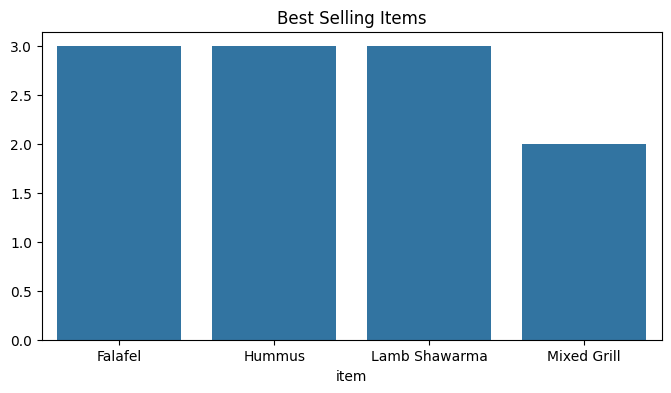

In [12]:
plt.figure(figsize=(8,4))
sns.barplot(x=best_selling.index, y=best_selling.values)
plt.title("Best Selling Items")
plt.show()

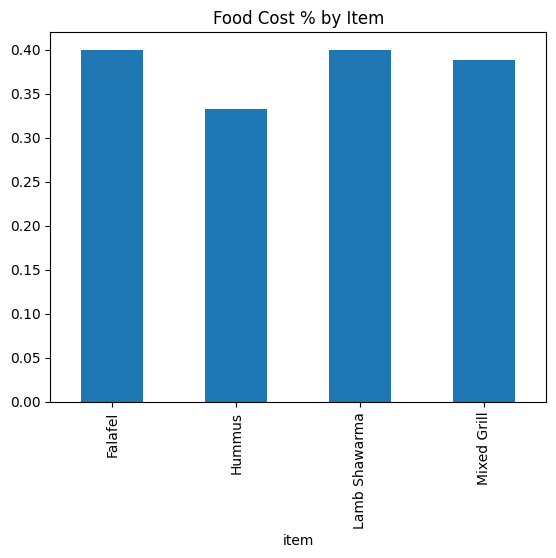

In [13]:
df.groupby("item")["food_cost_pct"].mean().plot(kind="bar")
plt.title("Food Cost % by Item")
plt.show()